#1.1
Sampling from Unifrom For Volume Computation


In [ ]:
generate_uni_points_Matrix <- function(dimenson, npoints) {
  return(matrix(runif(npoints*dimenson, min=-1, max=1), nrow=npoints,ncol=dimenson))
}
phi <- function(si) {
  return(sum(si * si) <= 1)  # Corrected multiplication operator
}
monte_carlo_uniform<-function(dimenson, npoints){
  mat=generate_uni_points_Matrix(dimenson, npoints)
  meow<- apply(mat,1,phi)
  est<-(sum(meow)/npoints)
  vol<-(sum(meow)/npoints)*(2^dimenson)
  var<-vol*(2^dimenson-vol)/(npoints-1)

  return (c(vol, var))
}
real_Vol <- function(d) {
  numerator<-pi^(d/2)
  half_d <- d / 2
  gamma_val <- gamma(half_d + 1)

  result <- numerator / gamma_val
  return(result)
}

vol_compConfInt <- function( est, vari, nn, alf ){
  norm = c(est - qnorm(1-alf/2)*sqrt(vari), est, est + qnorm(1-alf/2)*sqrt(vari) )
  cheb = c(est - sqrt(4*nn*alf)^(-1), est, est + sqrt(4*nn*alf)^(-1) )
  hoef = c(est - sqrt(-log(alf/2)/(2*nn)), est, est + sqrt(-log(alf/2)/(2*nn)) )
  return(
    rbind( norm,cheb,hoef )
  )
}


nn=5000
d=2
cat("True Volume For Dimenson 2", real_Vol(d),"\n")
a<-monte_carlo_uniform(d,nn)
vol_compConfInt(a[1],a[2],nn,0.05)
cat("\n")

nn=10000
d=3
cat("True Volume For Dimenson 3", real_Vol(d),"\n")
a<-monte_carlo_uniform(d,nn)
vol_compConfInt(a[1],a[2],nn,0.05)
cat("\n")


nn=25000
d=15
cat("True Volume For Dimenson 15", real_Vol(d),"\n")
# print(real_Vol(d))
a<-monte_carlo_uniform(d,nn)
vol_compConfInt(a[1],a[2],nn,0.05)

True Volume For Dimenson 2 3.141593 


norm,3.083033,3.1288,3.174567
cheb,3.097177,3.1288,3.160423
hoef,3.109594,3.1288,3.148006



True Volume For Dimenson 3 4.18879 


norm,4.052840,4.1312,4.209560
cheb,4.108839,4.1312,4.153561
hoef,4.117619,4.1312,4.144781



True Volume For Dimenson 15 0.3814433 


norm,0.000000000,0,0.000000000
cheb,-0.014142136,0,0.014142136
hoef,-0.008589388,0,0.008589388


#1.2
Sampling from Non-Uniform
Let our Beta random variable be Y~beta(1/2,1/2), 0<Y<1
but we want beta to be on -1<Y<1
So by applying scaling and shifting we get a new Random Variable X=2Y-1,
throught transformation of variable we get new pdf lets call it $$
g(x) = \frac{1}{\pi} \left( x + 1 \right)^{-\frac{1}{2}} \left( -x + 1 \right)^{-\frac{1}{2}}
$$**bold text**

[1] "True Volume For Dimenson 2"
[1] 3.141593


norm,3.063296,3.131418,3.199540
cheb,3.109057,3.131418,3.153779
hoef,3.117837,3.131418,3.144999


[1] ""
[1] "True Volume For Dimenson 3"
[1] 4.18879


norm,3.981635,4.145011,4.308388
cheb,4.122650,4.145011,4.167372
hoef,4.131430,4.145011,4.158592


[1] ""
[1] "True Volume For Dimenson 15"
[1] 0.3814433


norm,0.00000000,0,0.00000000
cheb,-0.02236068,0,0.02236068
hoef,-0.01358102,0,0.01358102


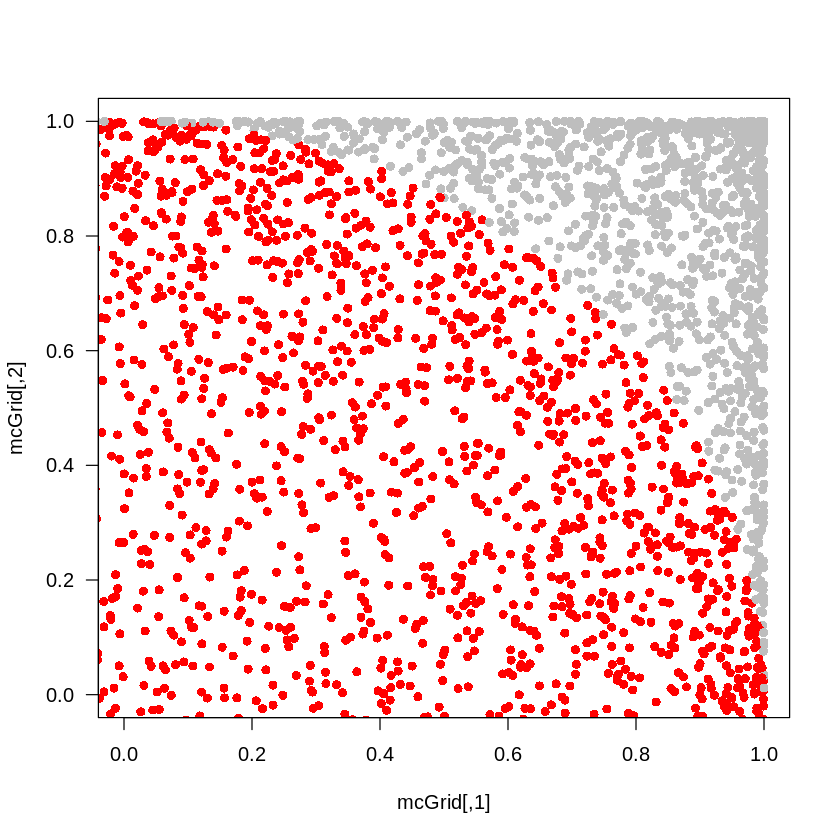

In [ ]:
# g<-function(x){
#   return ((1/pi)*(((x+1)^(-1/2))*(-x+1)^(-1/2)))
# }
g<-function(x){
  return (1/(pi*sqrt(1-x)*sqrt(1+x)))
}
phi <- function(si) {
  return(sum(si * si) <= 1)  # Corrected multiplication operator
}
vol_monteCarloBeta <- function(
  nn=50000, dd=4
){
  # generate nn * dd beta random variables
  mcGrid <- matrix(
    rbeta( nn*dd, shape1 = 1/2, shape2 = 1/2 ), nrow=nn, ncol=dd
  );
  # print(mcGrid)
  mcGrid=2*mcGrid-1
  # print(mcGrid)
  # Apply phi to each row in mcGrid
  # to determine if the point is in region D
  inRegion <- apply( mcGrid, 1, phi )
  # print(inRegion)

  betaWeight <- g(mcGrid)
  # print(betaWeight)

  betaWeight <- apply( betaWeight, 1, prod )
  #print(betaWeight)

  if((dd==2) )
    plot(
      mcGrid, xlim=c(0,1),ylim=c(0,1),las=1,
      col = c("gray","red")[inRegion+1],pch=16
    )
  # cat(inRegion, betaWeight)

  # print(inRegion/betaWeight)
  est = mean(inRegion/betaWeight)
  vari= (var(inRegion/betaWeight)/(nn-1))
  return(
    c(
      est,   # estimate for vol(D)
      vari   # estimate variance
    )
  )
}
vol_compConfInt <- function( est, vari, nn, alf ){
  norm = c(est - qnorm(1-alf/2)*sqrt(vari), est, est + qnorm(1-alf/2)*sqrt(vari) )
  cheb = c(est - sqrt(4*nn*alf)^(-1), est, est + sqrt(4*nn*alf)^(-1) )
  hoef = c(est - sqrt(-log(alf/2)/(2*nn)), est, est + sqrt(-log(alf/2)/(2*nn)) )
  return(
    rbind( norm,cheb,hoef )
  )
}

nn=10000
d=2
print("True Volume For Dimenson 2")
print(real_Vol(d))
a<-vol_monteCarloBeta(nn,d)
vol_compConfInt(a[1],a[2],nn,0.05)
cat("\n")

nn=10000
d=3
print("True Volume For Dimenson 3")
print(real_Vol(d))
a<-vol_monteCarloBeta(nn,d)
vol_compConfInt(a[1],a[2],nn,0.05)
cat("\n")

nn=10000
d=15
print("True Volume For Dimenson 15")
print(real_Vol(d))
a<-vol_monteCarloBeta(nn,d)
vol_compConfInt(a[1],a[2],nn,0.05)

#1.3
beta(2,2) distibution adjusted to [-1,1] is
$$ f(x)=\frac{3}{2}\left(1+x\right)\left(\frac{1}{2}-\frac{1}{2}x\right) $$


[1] "True Volume For Dimenson 2"
[1] 3.141593


norm,3.008222,3.067732,3.127241
cheb,3.036109,3.067732,3.099354
hoef,3.048525,3.067732,3.086938



[1] "True Volume For Dimenson 3"
[1] 4.18879


norm,4.097337,4.159457,4.221577
cheb,4.137096,4.159457,4.181817
hoef,4.145876,4.159457,4.173038



[1] "True Volume For Dimenson 15"
[1] 0.3814433


norm,0.2285269,0.3274586,0.4263903
cheb,0.3133165,0.3274586,0.3416007
hoef,0.3188692,0.3274586,0.3360480


[1] ""


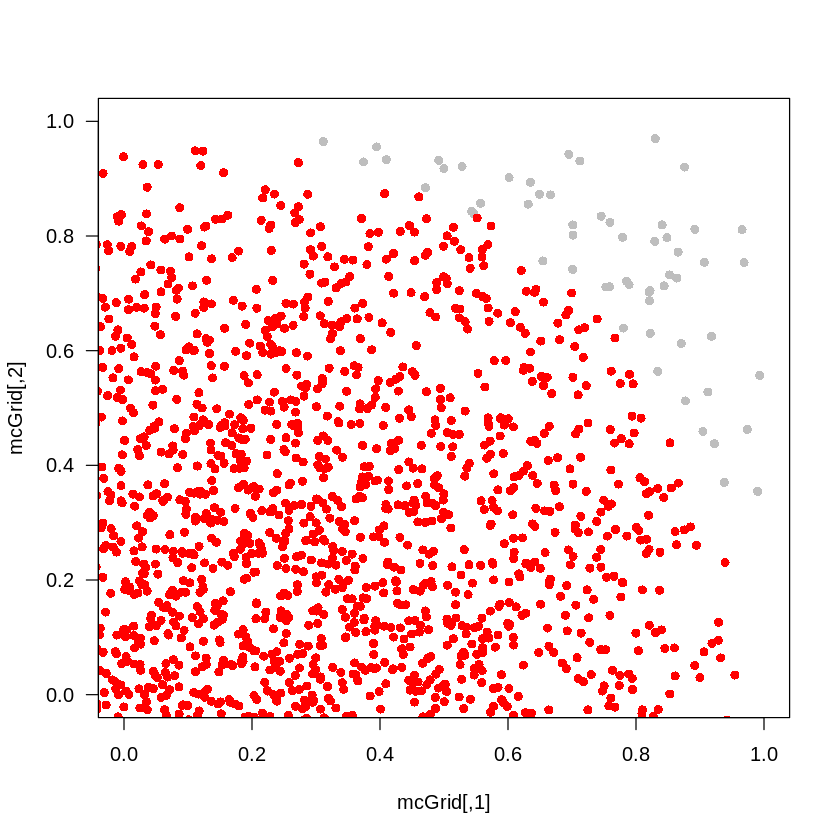

In [ ]:
fg<-function(x){
  return ((3/2) * (1 + x) * ((1/2) - (1/2) * x))
  # return ((3/2)*(1+x)((1/2)-(1/2)*x))
}
vol_monteCarloBeta2 <- function(
  nn=50000, dd=4
){
  # generate nn * dd beta random variables
  mcGrid <- matrix(
    rbeta( nn*dd, shape1 = 2, shape2 = 2 ), nrow=nn, ncol=dd
  );
  mcGrid=2*mcGrid-1
  # Apply phi to each row in mcGrid
  # to determine if the point is in region D
  inRegion <- apply( mcGrid, 1, phi )
  # print(inRegion)

  betaWeight <- fg(mcGrid)

  betaWeight <- apply( betaWeight, 1, prod )

  if( (dd==2) )
    plot(
      mcGrid, xlim=c(0,1),ylim=c(0,1),las=1,
      col = c("gray","red")[inRegion+1],pch=16
    )

  # print(inRegion/betaWeight)
  est = mean(inRegion/betaWeight)
  vari= var(inRegion/betaWeight)/(nn-1)
  return(
    c(
      est,   # estimate for vol(D)
      vari   # estimate variance
    )
  )
}

nn=5000
d=2
print("True Volume For Dimenson 2")
print(real_Vol(d))
a<-vol_monteCarloBeta2(nn,d)
vol_compConfInt(a[1],a[2],nn,0.05)
cat("\n")

nn=10000
d=3
print("True Volume For Dimenson 3")
print(real_Vol(d))
a<-vol_monteCarloBeta2(nn,d)
vol_compConfInt(a[1],a[2],nn,0.05)
cat("\n")

nn=25000
d=15
print("True Volume For Dimenson 15")
print(real_Vol(d))
a<-vol_monteCarloBeta2(nn,d)
vol_compConfInt(a[1],a[2],nn,0.05)
print("")



We can observe that as we increase our dimensons our estimation get more noisy and need to have more sampling points to get accurate statistics.

# 2 Monte Carlo Integration of Bessel Function

Uniform


In [ ]:
# OUR INTEGRAND
g<-function(m,t,x){
  k=cos(m*t-x*sin(t))
  return (k/(1/pi))
}
getInterval<-function(est,estVar,nn,alpha){
  z<-qnorm(1-alpha/2)
  return(c(est-z*(estVar/nn)^(1/2),est+z*(estVar/nn)^(1/2)))
}
monteCarloIntegrationUniform<-function(x,m,nn){
    rVector<-runif(nn, 0,pi)
    a<-g(m,rVector,x)
    est=mean(a)*(1/pi)
    cat("Real Bessel for bessel(x=",x," m=",m,") =",besselJ(x,m),"\n")

    cat("Estimate Mean", est,"\n")

    vari=var(a)*(1/pi^2)
    cat("Estimated Variance",vari,"\n")

    inter=getInterval(est,vari,nn,0.05)
    cat("Confidence Interval[",inter,"]\n")
    cat("\n")
    # print(inter)

    return(c(est,vari))
}
c=monteCarloIntegrationUniform(1,1,10000)
c=monteCarloIntegrationUniform(2,1,10000)
c=monteCarloIntegrationUniform(2,2,10000)
c=monteCarloIntegrationUniform(4,4,10000)



Real Bessel for bessel(x= 1  m= 1 ) = 0.4400506 
Estimate Mean 0.4393344 
Estimated Variance 0.4840699 
Confidence Interval[ 0.4256979 0.4529709 ]

Real Bessel for bessel(x= 2  m= 1 ) = 0.5767248 
Estimate Mean 0.5788179 
Estimated Variance 0.3452437 
Confidence Interval[ 0.5673016 0.5903341 ]

Real Bessel for bessel(x= 2  m= 2 ) = 0.352834 
Estimate Mean 0.3467494 
Estimated Variance 0.5213279 
Confidence Interval[ 0.3325979 0.3609009 ]

Real Bessel for bessel(x= 4  m= 4 ) = 0.2811291 
Estimate Mean 0.2745005 
Estimated Variance 0.5372041 
Confidence Interval[ 0.2601351 0.2888659 ]



#2.2
Given: $Y \sim \text{Beta}\left(\frac{1}{2}, \frac{1}{2}\right)$, $0 < Y < 1$.

We have to rescale such that $0 < Y < \pi$. So, $X = \pi Y$.

The PDF of $X$ is then:
$$f(x)=
\left(\frac{1}{\pi^2}\right) \cdot \left(\frac{1}{\sqrt{\frac{x}{\pi}}}\right) \cdot \left(\frac{1}{\sqrt{1 - \frac{x}{\pi}}}\right)
$$


In [ ]:
g<-function(m,t,x){
  k=cos(m*t-x*sin(t))
  l=sapply(t,betaPdf)

  return (k/l)
}
getInterval<-function(est,estVar,nn,alpha){
  z<-qnorm(1-alpha/2)
  return(c(est-z*(estVar/nn)^(1/2),est+z*(estVar/nn)^(1/2)))
}
betaPdf<-function(x){
  return ((1/(pi^2)) * (1/sqrt(x/pi)) * (1/sqrt(1 - x/pi)))
}
monteCarloIntegrationBeta<-function(x,m,nn){
    rVector<-pi*rbeta(nn,shape1=1/2,shape2=1/2)
    a<-g(m,rVector,x)
    est=(1/(pi))*mean(a)
    cat("Real Bessel for bessel(x=",x," m=",m,") =",besselJ(x,m),"\n")

    cat("Estimate Mean", est,"\n")

    vari=var(a)*(1/pi^2)
    cat("Estimated Variance",vari,"\n")

    inter=getInterval(est,vari,nn,0.05)
    cat("Confidence Interval[",inter,"]\n")
    cat("\n")
    return(c(est,vari,inter))
    }
c=monteCarloIntegrationBeta(1,1,10000)
a=monteCarloIntegrationBeta(2,1,10000)
a=monteCarloIntegrationBeta(2,2,10000)
a=monteCarloIntegrationBeta(4,4,10000)
a=monteCarloIntegrationBeta(4,1,10000)



Real Bessel for bessel(x= 1  m= 1 ) = 0.4400506 
Estimate Mean 0.438219 
Estimated Variance 0.5954912 
Confidence Interval[ 0.4230944 0.4533437 ]

Real Bessel for bessel(x= 2  m= 1 ) = 0.5767248 
Estimate Mean 0.5689938 
Estimated Variance 0.4993051 
Confidence Interval[ 0.5551444 0.5828432 ]

Real Bessel for bessel(x= 2  m= 2 ) = 0.352834 
Estimate Mean 0.3450792 
Estimated Variance 0.633686 
Confidence Interval[ 0.329477 0.3606814 ]

Real Bessel for bessel(x= 4  m= 4 ) = 0.2811291 
Estimate Mean 0.2912116 
Estimated Variance 0.6269125 
Confidence Interval[ 0.2756931 0.3067302 ]

Real Bessel for bessel(x= 4  m= 1 ) = -0.06604333 
Estimate Mean -0.07178585 
Estimated Variance 0.5131602 
Confidence Interval[ -0.08582609 -0.0577456 ]



#2.3
Given: $Y \sim \text{Beta}(2,2)$, $0 < Y < 1$.

We have to rescale such that $0 < Y < \pi$. So, $X = \pi Y$.

The PDF of $X$ is then:
$$
f(x)=\frac{{6x}}{{\pi^2}} \times \left(1 - \frac{x}{\pi}\right)
$$

In [ ]:
g<-function(m,t,x){
  k=cos(m*t-x*sin(t))
  l=sapply(t,betaPdf)

  return (k/l)
}
betaPdf<-function(x){
  return (((6*x)/(pi^2)) * (1-(x/pi)))
}
getInterval<-function(est,estVar,nn,alpha){
  z<-qnorm(1-alpha/2)
  return(c(est-z*(estVar/nn)^(1/2),est+z*(estVar/nn)^(1/2)))
}
monteCarloIntegrationBeta<-function(x,m,nn){
    rVector<-pi*rbeta(nn,shape1=2,shape2=2)
    a<-g(m,rVector,x)

    cat("Real Bessel for bessel(x=",x," m=",m,") =",besselJ(x,m),"\n")
    est=(1/(pi))*mean(a)
    cat("Estimate Mean", est,"\n")

    vari=var(a)*(1/pi^2)
    cat("Estimated Variance",vari,"\n")

    inter=getInterval(est,vari,nn,0.05)
    cat("Confidence Interval[",inter,"]\n")
    cat("\n")
    # return(rbind(c[inter[1]],c[inter[2]]))


    return(c(est, vari))
    }
a=monteCarloIntegrationBeta(1,1,10000)

a=monteCarloIntegrationBeta(2,1,10000)
a=monteCarloIntegrationBeta(2,2,10000)
a=monteCarloIntegrationBeta(4,4,10000)
a=monteCarloIntegrationBeta(4,1,10000)


Real Bessel for bessel(x= 1  m= 1 ) = 0.4400506 
Estimate Mean 0.4201218 
Estimated Variance 1.702933 
Confidence Interval[ 0.3945449 0.4456986 ]

Real Bessel for bessel(x= 2  m= 1 ) = 0.5767248 
Estimate Mean 0.5667005 
Estimated Variance 1.20924 
Confidence Interval[ 0.5451476 0.5882533 ]

Real Bessel for bessel(x= 2  m= 2 ) = 0.352834 
Estimate Mean 0.3375986 
Estimated Variance 1.580782 
Confidence Interval[ 0.3129561 0.3622411 ]

Real Bessel for bessel(x= 4  m= 4 ) = 0.2811291 
Estimate Mean 0.2874811 
Estimated Variance 1.702545 
Confidence Interval[ 0.2619072 0.313055 ]

Real Bessel for bessel(x= 4  m= 1 ) = -0.06604333 
Estimate Mean -0.08098914 
Estimated Variance 1.521191 
Confidence Interval[ -0.1051627 -0.05681562 ]

